In [1]:
import pandas as pd
import os


In [2]:
# CSV file 
csv_path = r"C:\Users\ajith\OneDrive\Desktop\Dissertation\cleaned_labels.csv"

df = pd.read_csv(csv_path)

print("Loaded CSV with rows:", len(df))
df.head()


Loaded CSV with rows: 84


,filename,label
0,IMG_20220411_106246.jpg,1
1,IMG_20220411_106256.jpg,0
2,IMG_20220411_106258.jpg,0
3,IMG_20220411_09235385.jpg,0
4,IMG_20220411_09235389.jpg,0


In [3]:

image_dir = r"C:\Users\ajith\OneDrive\Desktop\Dissertation\dataset\content\dataset"


df['exists'] = df['filename'].apply(lambda x: os.path.exists(os.path.join(image_dir, x)))


print("Matched image files:", df['exists'].sum(), "/", len(df))


df = df[df['exists']].copy()
df = df[['filename', 'label']]
df.head()


Matched image files: 84 / 84


,filename,label
0,IMG_20220411_106246.jpg,1
1,IMG_20220411_106256.jpg,0
2,IMG_20220411_106258.jpg,0
3,IMG_20220411_09235385.jpg,0
4,IMG_20220411_09235389.jpg,0


In [4]:
final_csv_path = r"C:\Users\ajith\OneDrive\Desktop\Dissertation\final_verified_labels.csv"
df.to_csv(final_csv_path, index=False)
print("Final verified labels saved at:", final_csv_path)


Final verified labels saved at: C:\Users\ajith\OneDrive\Desktop\Dissertation\final_verified_labels.csv


In [5]:
print(f" TASK 1 COMPLETE: {len(df)} image-label pairs are verified and ready.")
df.sample(5)


 TASK 1 COMPLETE: 84 image-label pairs are verified and ready.


,filename,label
10,IMG_20220413_09235637.jpg,0
45,IMG_20220429_09237611.jpg,0
50,IMG_20220511_09239333.jpg,0
75,IMG_20220620_09247425.jpg,0
38,IMG_20220426_09237108.jpg,0


In [6]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt


In [7]:
import pandas as pd

csv_path = r"C:\Users\ajith\OneDrive\Desktop\Dissertation\final_verified_labels.csv"
image_dir = r"C:\Users\ajith\OneDrive\Desktop\Dissertation\dataset\content\dataset"

df = pd.read_csv(csv_path)

print(f"Total samples: {len(df)}")
df.head()


Total samples: 84


,filename,label
0,IMG_20220411_106246.jpg,1
1,IMG_20220411_106256.jpg,0
2,IMG_20220411_106258.jpg,0
3,IMG_20220411_09235385.jpg,0
4,IMG_20220411_09235389.jpg,0


In [8]:
import pandas as pd

csv_path = r"C:\Users\ajith\OneDrive\Desktop\Dissertation\cleaned_labels.csv"
df = pd.read_csv(csv_path)

print(df.head())                    # View top rows
print(df['label'].unique())         # Check unique label values
print(df['label'].value_counts())   # Count how many of each class


                    filename label
0    IMG_20220411_106246.jpg     1
1    IMG_20220411_106256.jpg     0
2    IMG_20220411_106258.jpg     0
3  IMG_20220411_09235385.jpg     0
4  IMG_20220411_09235389.jpg     0
['1' '0' 'result not found']
label
0                   66
1                   16
result not found     2
Name: count, dtype: int64


In [9]:
import os
import pandas as pd
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array, save_img

# Input paths
csv_path = r"C:\Users\ajith\OneDrive\Desktop\Dissertation\cleaned_labels.csv"
image_dir = r"C:\Users\ajith\OneDrive\Desktop\Dissertation\dataset\content\dataset"
output_dir = os.path.join(image_dir, "augmented")
os.makedirs(output_dir, exist_ok=True)

# Load CSV and keep only COVID-positive rows
df = pd.read_csv(csv_path)
df = df[df['label'].isin(['0', '1'])]     # Remove bad rows like 'result not found'
positive_df = df[df['label'] == '1']      # Correct way to select COVID-positive rows

print(f"Found {len(positive_df)} COVID-positive images to augment.")

# Image augmentor
augmentor = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Settings
AUG_PER_IMAGE = 5
augmented_entries = []

# Process positive images only
for _, row in positive_df.iterrows():
    img_path = os.path.join(image_dir, row['filename'])
    base_name = os.path.splitext(os.path.basename(row['filename']))[0]

    if not os.path.exists(img_path):
        print(f"File not found: {img_path}")
        continue

    try:
        img = load_img(img_path)
        x = img_to_array(img).reshape((1,) + img.size + (3,))  # Ensure shape is (1, height, width, 3)

        for i, batch in enumerate(augmentor.flow(x, batch_size=1)):
            aug_filename = f"{base_name}_aug_{i}.jpg"
            aug_path = os.path.join(output_dir, aug_filename)
            save_img(aug_path, batch[0])

            # Store label 1 for each augmented file
            augmented_entries.append({'filename': os.path.join('augmented', aug_filename), 'label': 1})
            print(f"Saved augmented image: {aug_filename}")

            if i + 1 >= AUG_PER_IMAGE:
                break

    except Exception as e:
        print(f"⚠️ Error processing {img_path}: {e}")

# Save new CSV with only augmented entries
augmented_df = pd.DataFrame(augmented_entries)
output_csv = r"C:\Users\ajith\OneDrive\Desktop\Dissertation\cleaned_labels_augmented.csv"
augmented_df.to_csv(output_csv, index=False)
print(f"Saved new CSV with only augmented positives: {output_csv}")


Found 16 COVID-positive images to augment.
Saved augmented image: IMG_20220411_106246_aug_0.jpg
Saved augmented image: IMG_20220411_106246_aug_1.jpg
Saved augmented image: IMG_20220411_106246_aug_2.jpg
Saved augmented image: IMG_20220411_106246_aug_3.jpg
Saved augmented image: IMG_20220411_106246_aug_4.jpg
Saved augmented image: IMG_20220413_09235579_aug_0.jpg
Saved augmented image: IMG_20220413_09235579_aug_1.jpg
Saved augmented image: IMG_20220413_09235579_aug_2.jpg
Saved augmented image: IMG_20220413_09235579_aug_3.jpg
Saved augmented image: IMG_20220413_09235579_aug_4.jpg
Saved augmented image: IMG_20220413_09235624_aug_0.jpg
Saved augmented image: IMG_20220413_09235624_aug_1.jpg
Saved augmented image: IMG_20220413_09235624_aug_2.jpg
Saved augmented image: IMG_20220413_09235624_aug_3.jpg
Saved augmented image: IMG_20220413_09235624_aug_4.jpg
Saved augmented image: IMG_20220413_09235641_aug_0.jpg
Saved augmented image: IMG_20220413_09235641_aug_1.jpg
Saved augmented image: IMG_20220

In [10]:
# import tensorflow as tf
# from tensorflow.keras.preprocessing.image import ImageDataGenerator
# import pandas as pd
# import os

# # Define paths
# IMAGE_DIR = r'C:\Users\ajith\OneDrive\Desktop\Dissertation\dataset\content\dataset'
# CSV_PATH = 'cleaned_labels.csv'  # Or 'cleaned_labels.csv'
# df = pd.read_csv(CSV_PATH)

# # Image parameters
# img_size = (224, 224)
# batch_size = 32

# # Data augmentation for training
# train_datagen = ImageDataGenerator(
#     rescale=1./255,
#     rotation_range=15,
#     width_shift_range=0.1,
#     height_shift_range=0.1,
#     shear_range=0.1,
#     zoom_range=0.1,
#     horizontal_flip=True,
#     validation_split=0.2
# )

# # Only rescaling for validation
# val_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

# train_generator = train_datagen.flow_from_dataframe(
#     dataframe=df,
#     directory=IMAGE_DIR,
#     x_col='filename',
#     y_col='label',
#     target_size=img_size,
#     batch_size=batch_size,
#     class_mode='categorical',
#     subset='training',
#     shuffle=True
# )

# val_generator = val_datagen.flow_from_dataframe(
#     dataframe=df,
#     directory=IMAGE_DIR,
#     x_col='filename',
#     y_col='label',
#     target_size=img_size,
#     batch_size=batch_size,
#     class_mode='categorical',
#     subset='validation',
#     shuffle=False
# )

# num_classes = len(train_generator.class_indices)
# num_train_samples = train_generator.samples

In [11]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,
    horizontal_flip=True,     # ← mirror image enabled
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.1,
    fill_mode='nearest'
)


In [12]:
x_batch, y_batch = next(train_generator)

plt.figure(figsize=(12, 6))
for i in range(8):
    plt.subplot(2, 4, i+1)
    plt.imshow(x_batch[i])
    label_idx = y_batch[i].argmax()
    plt.title(f"Label: {label_idx}")
    plt.axis('off')
plt.tight_layout()
plt.show()


NameError: name 'train_generator' is not defined

Phase 2:

In [ ]:
import os
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.applications import MobileNetV3Small
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.utils.class_weight import compute_class_weight
from sklearn.metrics import matthews_corrcoef, accuracy_score, f1_score, roc_auc_score, confusion_matrix
from sklearn.model_selection import StratifiedKFold
from keras import backend as K

In [ ]:
# Dataset Paths
orig_dir = "C:/Users/ajith/OneDrive/Desktop/Dissertation/dataset/content/dataset"
aug_dir = "C:/Users/ajith/OneDrive/Desktop/Dissertation/dataset/content/dataset/augmented"

# Load CSVs
df_orig = pd.read_csv("cleaned_labels.csv")
df_aug = pd.read_csv("cleaned_labels_augmented.csv")

# Add image paths
df_orig['path'] = df_orig['filename'].apply(lambda x: os.path.join(orig_dir, x))
df_aug['path'] = df_aug['filename'].apply(lambda x: os.path.join(aug_dir, x))

# Merge and prepare
df = pd.concat([df_orig, df_aug], ignore_index=True)
df['label_str'] = df['label'].astype(str)


In [ ]:
# Prepare for Stratified K-Fold
df['label'] = df['label'].astype(int)     # Ensure labels are int
X = df.index.values                       # dummy X, we just need indices
y = df['label'].values

kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

for fold, (train_idx, val_idx) in enumerate(kfold.split(X, y)):
    print(f"Fold {fold + 1}")
    train_df = df.iloc[train_idx].copy()
    val_df = df.iloc[val_idx].copy()

    # Class weight calculation
    class_weights = compute_class_weight(class_weight='balanced',
                                         classes=np.unique(train_df['label']),
                                         y=train_df['label'])
    class_weights = dict(zip(np.unique(train_df['label']), class_weights))

    # Generators
    train_gen = datagen.flow_from_dataframe(train_df, x_col='path', y_col='label_str',
                                            target_size=(224, 224), class_mode='binary', batch_size=16)
    val_gen = datagen.flow_from_dataframe(val_df, x_col='path', y_col='label_str',
                                          target_size=(224, 224), class_mode='binary', batch_size=16, shuffle=False)

    # Model architecture
    base_model = MobileNetV3Small(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
    for layer in base_model.layers[:-40]:
        layer.trainable = False

    x = base_model.output
    x = GlobalAveragePooling2D()(x)
    x = Dropout(0.4)(x)
    output = Dense(1, activation='sigmoid')(x)
    model = Model(inputs=base_model.input, outputs=output)

    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),
                  loss=focal_loss(), metrics=['accuracy', tf.keras.metrics.AUC(name='auc')])

    # Train
    history = model.fit(train_gen, validation_data=val_gen, epochs=20,
                        class_weight=class_weights, verbose=1)

    histories.append(history)

    # Predict and evaluate
    y_pred_prob = model.predict(val_gen)
    y_pred = (y_pred_prob > 0.5).astype(int)
    y_true = val_df['label'].values

    acc = accuracy_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    auc = roc_auc_score(y_true, y_pred_prob)
    mcc = matthews_corrcoef(y_true, y_pred)

    print(f"Accuracy: {acc:.4f}, F1: {f1:.4f}, AUC: {auc:.4f}, MCC: {mcc:.4f}")
    scores.append({'fold': fold+1, 'accuracy': acc, 'f1': f1, 'auc': auc, 'mcc': mcc})

# Summary
score_df = pd.DataFrame(scores)
print("\nFinal Scores per Fold:")
print(score_df)


ValueError: invalid literal for int() with base 10: 'result not found'

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy', tf.keras.metrics.AUC(name='auc')])


In [ ]:
for fold, (train_idx, val_idx) in enumerate(kf.split(X, y), 1):
    print(f"\n Fold {fold}")
    train_df = df.iloc[train_idx].copy().reset_index(drop=True)
    val_df = df.iloc[val_idx].copy().reset_index(drop=True)
    train_df['label_str'] = train_df['label'].astype(str)
    val_df['label_str'] = val_df['label'].astype(str)

    datagen = ImageDataGenerator(rescale=1./255)
    train_gen = datagen.flow_from_dataframe(train_df, x_col='path', y_col='label_str',
                                            target_size=(224, 224), class_mode='binary', batch_size=16)
    val_gen = datagen.flow_from_dataframe(val_df, x_col='path', y_col='label_str',
                                          target_size=(224, 224), class_mode='binary', batch_size=16)

    # MobileNetV3 setup
    base_model = MobileNetV3Small(input_shape=(224, 224, 3), include_top=False, weights='imagenet')
    base_model.trainable = True
    for layer in base_model.layers[:-40]:
        layer.trainable = False

    x = GlobalAveragePooling2D()(base_model.output)
    x = Dropout(0.3)(x)
    x = Dense(128, activation='relu')(x)
    x = Dropout(0.2)(x)
    output = Dense(1, activation='sigmoid')(x)
    model = Model(inputs=base_model.input, outputs=output)

    model.compile(optimizer=tf.keras.optimizers.Adam(1e-4),
                  loss=tfa.losses.SigmoidFocalCrossEntropy(),
                  metrics=['accuracy', tf.keras.metrics.AUC()])

    callbacks = [
        EarlyStopping(patience=5, restore_best_weights=True),
        ReduceLROnPlateau(patience=2)
    ]

    model.fit(train_gen, validation_data=val_gen, epochs=20, callbacks=callbacks, verbose=1)

    # Evaluate
    val_gen.reset()
    preds = model.predict(val_gen).ravel()
    true_labels = val_gen.classes

    # Threshold sweep
    best_mcc, best_thresh = -1, 0.5
    for t in np.arange(0.2, 0.81, 0.1):
        pred_labels = (preds > t).astype(int)
        mcc = matthews_corrcoef(true_labels, pred_labels)
        if mcc > best_mcc:
            best_mcc = mcc
            best_thresh = t

    final_preds = (preds > best_thresh).astype(int)
    cm = confusion_matrix(true_labels, final_preds)
    acc = accuracy_score(true_labels, final_preds)
    f1 = f1_score(true_labels, final_preds, zero_division=0)
    auc = roc_auc_score(true_labels, preds)
    precision = precision_score(true_labels, final_preds, zero_division=0)
    recall = recall_score(true_labels, final_preds, zero_division=0)

    print(f"Best threshold = {best_thresh:.2f} with MCC = {best_mcc:.4f}")
    print("Confusion Matrix:\n", cm)
    print("Classification Report:\n", classification_report(true_labels, final_preds))

    # Histogram
    plt.hist(preds, bins=20)
    plt.title(f"Fold {fold} - Predicted Probabilities")
    plt.xlabel("Probability")
    plt.ylabel("Count")
    plt.show()

    results.append({
        'fold': fold,
        'threshold': best_thresh,
        'mcc': best_mcc,
        'auc': auc,
        'f1': f1,
        'acc': acc,
        'precision': precision,
        'recall': recall
    })

# Summary
print("\n K-Fold Summary:")
for r in results:
    print(f"Fold {r['fold']} ➤ ACC: {r['acc']:.4f}, MCC: {r['mcc']:.4f}, AUC: {r['auc']:.4f}, F1: {r['f1']:.4f}, PREC: {r['precision']:.4f}, RECALL: {r['recall']:.4f}, THRESH: {r['threshold']:.2f}")

avg = {k: np.mean([r[k] for r in results]) for k in ['acc', 'mcc', 'auc', 'f1', 'precision', 'recall']}
print("\n Averages Across Folds:")
for k, v in avg.items():
    print(f"{k.upper()}: {v:.4f}")



🔁 Fold 1


KeyError: 'path'

In [ ]:
# Step 8: Train with class weights
history = model.fit(
    train_gen,
    validation_data=val_gen,
    epochs=20,
    class_weight=class_weights
)

# Step 9: Fine-tune (optional)
base_model.trainable = True
model.compile(
    optimizer=optimizers.Adam(learning_rate=1e-5),
    loss='binary_crossentropy',
    metrics=['accuracy', tf.keras.metrics.AUC(name='auc')]
)

history_fine = model.fit(
    train_gen,
    validation_data=val_gen,
    epochs=10,
    class_weight=class_weights
)


Epoch 1/20
9/9 [==============================] - 5s 180ms/step - loss: 0.7092 - accuracy: 0.3538 - auc: 0.4822 - val_loss: 0.7490 - val_accuracy: 0.1765 - val_auc: 0.5000
Epoch 2/20
9/9 [==============================] - 1s 68ms/step - loss: 0.7500 - accuracy: 0.5231 - auc: 0.3617 - val_loss: 0.6190 - val_accuracy: 0.8235 - val_auc: 0.4286
Epoch 3/20
9/9 [==============================] - 1s 68ms/step - loss: 0.7225 - accuracy: 0.5846 - auc: 0.4016 - val_loss: 0.6404 - val_accuracy: 0.8235 - val_auc: 0.4286
Epoch 4/20
9/9 [==============================] - 1s 76ms/step - loss: 0.7244 - accuracy: 0.6000 - auc: 0.4038 - val_loss: 0.6641 - val_accuracy: 0.8235 - val_auc: 0.3929
Epoch 5/20
9/9 [==============================] - 1s 75ms/step - loss: 0.7229 - accuracy: 0.6154 - auc: 0.4216 - val_loss: 0.6909 - val_accuracy: 0.8235 - val_auc: 0.5000
Epoch 6/20
9/9 [==============================] - 1s 77ms/step - loss: 0.6875 - accuracy: 0.5231 - auc: 0.5732 - val_loss: 0.7210 - val_accuracy

In [ ]:
# Step 10: Evaluate
val_gen.reset()
y_true = val_gen.classes
y_probs = model.predict(val_gen).ravel()
y_pred = (y_probs > 0.5).astype(int)

# Metrics
report = classification_report(y_true, y_pred, output_dict=True, target_names=["Negative", "Positive"])
cm = confusion_matrix(y_true, y_pred)


3/3 [==============================] - 1s 46ms/step


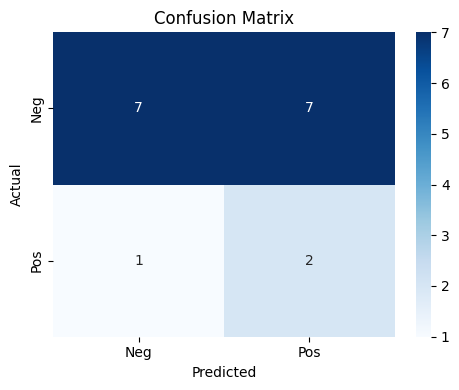

In [ ]:
accuracy = report["accuracy"]
precision = report["Positive"]["precision"]
recall = report["Positive"]["recall"]
specificity = report["Negative"]["recall"]
f1 = report["Positive"]["f1-score"]
auc = roc_auc_score(y_true, y_probs)
mcc = matthews_corrcoef(y_true, y_pred)

# Confusion matrix
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["Neg", "Pos"], yticklabels=["Neg", "Pos"])
plt.xlabel("Predicted"); plt.ylabel("Actual"); plt.title("Confusion Matrix")
plt.tight_layout()
plt.show()

In [ ]:
print("Final Validation Metrics:")
print(f"Accuracy:     {accuracy:.4f}")
print(f"Precision:    {precision:.4f}")
print(f"Recall:       {recall:.4f} (Sensitivity)")
print(f"Specificity:  {specificity:.4f}")
print(f"F1 Score:     {f1:.4f}")
print(f"AUC:          {auc:.4f}")
print(f"MCC:          {mcc:.4f}")

✅ Final Validation Metrics:
Accuracy:     0.5294
Precision:    0.2222
Recall:       0.6667 (Sensitivity)
Specificity:  0.5000
F1 Score:     0.3333
AUC:          0.5714
MCC:          0.1273


Phase 3:


In [ ]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, matthews_corrcoef, roc_auc_score, f1_score, precision_score, recall_score
from sklearn.utils.class_weight import compute_class_weight
import tensorflow as tf
from tensorflow.keras.applications import MobileNetV3Small
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau


In [ ]:
# Setup paths
IMG_ROOT = r'C:/Users/ajith/OneDrive/Desktop/Dissertation/dataset/content/dataset'
NORMAL_IMG_DIR = IMG_ROOT
AUGMENTED_IMG_DIR = os.path.join(IMG_ROOT, "augmented")

# Load CSVs
normal_df = pd.read_csv(r'C:/Users/ajith/OneDrive/Desktop/Dissertation/cleaned_labels.csv')
aug_df = pd.read_csv(r'C:/Users/ajith/OneDrive/Desktop/Dissertation/cleaned_labels_augmented.csv')
normal_df = normal_df[normal_df['label'].isin(['0', '1'])].copy()
normal_df['label'] = normal_df['label'].astype(str).str.strip().astype(int)
aug_df['label'] = aug_df['label'].astype(int)
aug_df = aug_df.sample(n=min(32, len(aug_df)), random_state=42)
df = pd.concat([normal_df, aug_df], ignore_index=True)

def resolve_path(filename):
    parts = filename.replace('\\', '/').split('/')
    if parts[0] == 'augmented':
        return os.path.join(AUGMENTED_IMG_DIR, *parts[1:])
    return os.path.join(NORMAL_IMG_DIR, *parts)

df['path'] = df['filename'].apply(resolve_path)

In [ ]:
# Train/test split
df_0 = df[df['label'] == 0]
df_1 = df[df['label'] == 1]
train_0, val_0 = train_test_split(df_0, test_size=0.2, random_state=42)
train_1, val_1 = train_test_split(df_1, test_size=0.2, random_state=42)
train_df = pd.concat([train_0, train_1]).sample(frac=1).reset_index(drop=True)
val_df = pd.concat([val_0, val_1]).sample(frac=1).reset_index(drop=True)
train_df['label_str'] = train_df['label'].astype(str)
val_df['label_str'] = val_df['label'].astype(str)

In [ ]:
# Class weights
class_weights = compute_class_weight(class_weight='balanced', classes=np.array([0, 1]), y=train_df['label'])
class_weights = dict(zip([0, 1], class_weights))

# Generators
datagen = ImageDataGenerator(rescale=1./255)
train_gen = datagen.flow_from_dataframe(train_df, x_col='path', y_col='label_str', target_size=(224, 224), class_mode='binary', batch_size=16)
val_gen = datagen.flow_from_dataframe(val_df, x_col='path', y_col='label_str', target_size=(224, 224), class_mode='binary', batch_size=16)

# Build model with deeper fine-tuning
base_model = MobileNetV3Small(input_shape=(224, 224, 3), include_top=False, weights='imagenet')
base_model.trainable = True
for layer in base_model.layers[:-5]:
    layer.trainable = False

Found 90 validated image filenames belonging to 2 classes.
Found 24 validated image filenames belonging to 2 classes.


In [ ]:
x = GlobalAveragePooling2D()(base_model.output)
x = Dense(64, activation='relu')(x)
output = Dense(1, activation='sigmoid')(x)
model = Model(inputs=base_model.input, outputs=output)

model.compile(optimizer=tf.keras.optimizers.Adam(1e-4),
              loss='binary_crossentropy',
              metrics=['accuracy', tf.keras.metrics.AUC(name='auc'),
                       tf.keras.metrics.Precision(name='precision'),
                       tf.keras.metrics.Recall(name='recall')])

callbacks = [EarlyStopping(patience=5, restore_best_weights=True), ReduceLROnPlateau(patience=2)]

# Train normally
model.fit(train_gen, validation_data=val_gen, epochs=20, class_weight=class_weights, callbacks=callbacks)


Epoch 1/20
6/6 [==============================] - 3s 170ms/step - loss: 0.6960 - accuracy: 0.4222 - auc: 0.4663 - precision: 0.4222 - recall: 1.0000 - val_loss: 0.6835 - val_accuracy: 0.5833 - val_auc: 0.7286 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - lr: 1.0000e-04
Epoch 2/20
6/6 [==============================] - 0s 50ms/step - loss: 0.6941 - accuracy: 0.4222 - auc: 0.4476 - precision: 0.4222 - recall: 1.0000 - val_loss: 0.6830 - val_accuracy: 0.5833 - val_auc: 0.6429 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - lr: 1.0000e-04
Epoch 3/20
6/6 [==============================] - 0s 54ms/step - loss: 0.6938 - accuracy: 0.4222 - auc: 0.4818 - precision: 0.4222 - recall: 1.0000 - val_loss: 0.6824 - val_accuracy: 0.5833 - val_auc: 0.7857 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - lr: 1.0000e-04
Epoch 4/20
6/6 [==============================] - 0s 56ms/step - loss: 0.6930 - accuracy: 0.5000 - auc: 0.5076 - precision: 0.4545 - recall: 0.9211 - val_loss: 0.682

In [ ]:
val_gen.reset()
preds = model.predict(val_gen)
pred_labels = (preds > 0.5).astype(int)
true_labels = val_gen.classes

2/2 [==============================] - 0s 22ms/step


In [ ]:
unique, counts = np.unique(pred_labels, return_counts=True)
print("🔍 Predicted class counts:", dict(zip(unique, counts)))

# MCC threshold sweep
for t in [0.3, 0.4, 0.5, 0.6, 0.7]:
    swept = (preds > t).astype(int)
    print(f"Threshold {t:.1f} ➤ MCC = {matthews_corrcoef(true_labels, swept):.4f}")

# Sanity check overfit on 10 samples
tiny_df = train_df.sample(10, random_state=42)
tiny_df['label_str'] = tiny_df['label'].astype(str)
tiny_gen = datagen.flow_from_dataframe(tiny_df, x_col='path', y_col='label_str',
                                       target_size=(224, 224), class_mode='binary', batch_size=2)
model.fit(tiny_gen, epochs=10)

# Show sample prediction values
print("Sample prediction probs:", preds[:10].ravel())


🔍 Predicted class counts: {0: 24}
Threshold 0.3 ➤ MCC = 0.0000
Threshold 0.4 ➤ MCC = 0.0000
Threshold 0.5 ➤ MCC = 0.0000
Threshold 0.6 ➤ MCC = 0.0000
Threshold 0.7 ➤ MCC = 0.0000
Found 10 validated image filenames belonging to 2 classes.
Epoch 1/10
5/5 [==============================] - 1s 16ms/step - loss: 0.6955 - accuracy: 0.4000 - auc: 0.5000 - precision: 0.4000 - recall: 1.0000
Epoch 2/10
5/5 [==============================] - 0s 17ms/step - loss: 0.6953 - accuracy: 0.4000 - auc: 0.5000 - precision: 0.4000 - recall: 1.0000
Epoch 3/10
5/5 [==============================] - 0s 16ms/step - loss: 0.6953 - accuracy: 0.4000 - auc: 0.5000 - precision: 0.4000 - recall: 1.0000          
Epoch 4/10
5/5 [==============================] - 0s 16ms/step - loss: 0.6951 - accuracy: 0.4000 - auc: 0.5000 - precision: 0.4000 - recall: 1.0000          
Epoch 5/10
5/5 [==============================] - 0s 16ms/step - loss: 0.6952 - accuracy: 0.4000 - auc: 0.5000 - precision: 0.4000 - recall: 1.0000   

In [ ]:
# Threshold sweep
for t in [0.3, 0.4, 0.5, 0.6, 0.7]:
    swept_preds = (preds > t).astype(int)
    mcc = matthews_corrcoef(true_labels, swept_preds)
    print(f"Threshold {t:.1f} ➤ MCC = {mcc:.4f}")

Threshold 0.3 ➤ MCC = 0.0000
Threshold 0.4 ➤ MCC = 0.0000
Threshold 0.5 ➤ MCC = 0.0000
Threshold 0.6 ➤ MCC = 0.0000
Threshold 0.7 ➤ MCC = 0.0000


In [ ]:
results[lr] = {
        "accuracy": acc,
        "sensitivity": sensitivity,
        "specificity": specificity,
        "mcc": mcc,
        "auc": auc,
        "f1": f1,
        "precision": precision
    }

print(classification_report(true_labels, pred_labels))
print(f"✔️ Metrics for LR={lr}: ACC={acc:.4f}, MCC={mcc:.4f}, AUC={auc:.4f}, SEN={sensitivity:.4f}, SPEC={specificity:.4f}, F1={f1:.4f}, PREC={precision:.4f}")

# Summary of all learning rates
print("\n📊 Summary Across Learning Rates")
for lr, metric in results.items():
    print(f"LR={lr:.0e} | ACC={metric['accuracy']:.4f} | MCC={metric['mcc']:.4f} | AUC={metric['auc']:.4f} | SEN={metric['sensitivity']:.4f} | SPEC={metric['specificity']:.4f} | F1={metric['f1']:.4f} | PREC={metric['precision']:.4f}")


              precision    recall  f1-score   support

           0       0.00      0.00      0.00        14
           1       0.42      1.00      0.59        10

    accuracy                           0.42        24
   macro avg       0.21      0.50      0.29        24
weighted avg       0.17      0.42      0.25        24

✔️ Metrics for LR=1e-05: ACC=0.4167, MCC=0.0000, AUC=0.4429, SEN=1.0000, SPEC=0.0000, F1=0.5882, PREC=0.4167

📊 Summary Across Learning Rates
LR=1e-05 | ACC=0.4167 | MCC=0.0000 | AUC=0.4429 | SEN=1.0000 | SPEC=0.0000 | F1=0.5882 | PREC=0.4167


c:\Users\ajith\miniconda3\envs\tongue_cnn\lib\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\ajith\miniconda3\envs\tongue_cnn\lib\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\ajith\miniconda3\envs\tongue_cnn\lib\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()}

Phase 4:


In [ ]:
from tensorflow.keras.applications import ConvNeXtTiny
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, GlobalAveragePooling2D, Dropout, Dense

input_shape = (224, 224, 3)
num_classes = len(train_generator.class_indices)

base_model = ConvNeXtTiny(
    include_top=False,
    input_shape=input_shape,
    weights="imagenet",
    pooling=None
)

# Freeze base
base_model.trainable = False

# Add custom head
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dropout(0.5)(x)
output = Dense(num_classes, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=output)
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


NameError: name 'train_generator' is not defined